In [1]:
# EDA
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import sweetviz as sv

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    recall_score,
)

# Optimizing hyperparameters
import optuna

## Exploratory Data Analysis


In [2]:
df_obesity = pd.read_csv("./datasets/obesity_dataset.csv")

In [3]:
df_obesity.head(10)

,genero_masculino,idade,historico_familiar_sobrepeso,consumo_alta_caloria_com_frequencia,consumo_vegetais_com_frequencia,refeicoes_dia,consumo_alimentos_entre_refeicoes,fumante,consumo_agua,monitora_calorias_ingeridas,nivel_atividade_fisica,nivel_uso_tela,consumo_alcool,transporte_automovel,transporte_bicicleta,transporte_motocicleta,transporte_publico,transporte_caminhada,obeso
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0
5,1,29.0,0,1,2.0,3.0,1,0,2.0,0,0.0,0.0,1,1,0,0,0,0,0
6,0,23.0,1,1,3.0,3.0,1,0,2.0,0,1.0,0.0,1,0,0,1,0,0,0
7,1,22.0,0,0,2.0,3.0,1,0,2.0,0,3.0,0.0,1,0,0,0,1,0,0
8,1,24.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,2,0,0,0,1,0,0
9,1,22.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,0,0,0,0,1,0,0


In [4]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   genero_masculino                     2111 non-null   int64  
 1   idade                                2111 non-null   float64
 2   historico_familiar_sobrepeso         2111 non-null   int64  
 3   consumo_alta_caloria_com_frequencia  2111 non-null   int64  
 4   consumo_vegetais_com_frequencia      2111 non-null   float64
 5   refeicoes_dia                        2111 non-null   float64
 6   consumo_alimentos_entre_refeicoes    2111 non-null   int64  
 7   fumante                              2111 non-null   int64  
 8   consumo_agua                         2111 non-null   float64
 9   monitora_calorias_ingeridas          2111 non-null   int64  
 10  nivel_atividade_fisica               2111 non-null   float64
 11  nivel_uso_tela                

In [5]:
# Convert float64 columns to int64
integer_columns = [
    "idade",
    "consumo_vegetais_com_frequencia",
    "refeicoes_dia",
    "consumo_agua",
    "nivel_atividade_fisica",
    "nivel_uso_tela",
]

df_obesity[integer_columns] = df_obesity[integer_columns].astype(int)

In [6]:
df_obesity.isna().sum()

genero_masculino                       0
idade                                  0
historico_familiar_sobrepeso           0
consumo_alta_caloria_com_frequencia    0
consumo_vegetais_com_frequencia        0
refeicoes_dia                          0
consumo_alimentos_entre_refeicoes      0
fumante                                0
consumo_agua                           0
monitora_calorias_ingeridas            0
nivel_atividade_fisica                 0
nivel_uso_tela                         0
consumo_alcool                         0
transporte_automovel                   0
transporte_bicicleta                   0
transporte_motocicleta                 0
transporte_publico                     0
transporte_caminhada                   0
obeso                                  0
dtype: int64

In [7]:
px.bar(
    df_obesity.value_counts("obeso"),
    title="Obesity distribution",
    labels={"value": "Count"},
)

In [8]:
px.bar(
    df_obesity.value_counts("obeso") / len(df_obesity) * 100,
    title="Obesity distribution (%)",
    labels={"value": "Percentage"},
)

In [9]:
px.histogram(
    df_obesity,
    x="idade",
    marginal="box",
    title="Age distribution",
    labels={"idade": "Age"},
)

In [10]:
px.bar(
    df_obesity.value_counts("genero_masculino") / len(df_obesity) * 100,
    title="Gender distribution (%)",
    labels={"value": "Percentage"},
)

In [11]:
px.bar(
    df_obesity.value_counts("historico_familiar_sobrepeso") / len(df_obesity) * 100,
    title="Family overweight history distribution (%)",
    labels={"value": "Percentage"},
)

In [12]:
px.bar(
    df_obesity.value_counts("nivel_atividade_fisica") / len(df_obesity) * 100,
    title="Physical activity level distribution (%)",
    labels={"value": "Percentage"},
)

In [13]:
px.bar(
    df_obesity.value_counts("nivel_uso_tela") / len(df_obesity) * 100,
    title="Screen time level distribution (%)",
    labels={"value": "Percentage"},
)

In [14]:
df_obesity["idade"].describe()

count    2111.000000
mean       23.972525
std         6.308664
min        14.000000
25%        19.000000
50%        22.000000
75%        26.000000
max        61.000000
Name: idade, dtype: float64

In [15]:
# Bucketing de idade
idade_bins = [10, 20, 30, 40, 50, 60, 70]
idade_ordinal_bins = [0, 1, 2, 3, 4, 5]
faixa_etaria_labels = ["10-20", "20-30", "30-40", "40-50", "50-60", "60-70"]

df_obesity["faixa_etaria_string"] = pd.cut(
    df_obesity["idade"],
    bins=idade_bins,
    labels=faixa_etaria_labels,
    include_lowest=True,
)

df_obesity["faixa_etaria"] = pd.cut(
    df_obesity["idade"],
    bins=idade_bins,
    labels=idade_ordinal_bins,
    include_lowest=True,
)

In [16]:
faixa_etaria_contingency_table = sm.stats.Table.from_data(
    df_obesity[["obeso", "faixa_etaria_string"]]
)
faixa_etaria_contingency_table.table_orig

faixa_etaria_string,10-20,20-30,30-40,40-50,50-60,60-70
obeso,,,,,,
0,498,489,131,13,7,1
1,176,649,127,19,1,0


In [17]:
print(faixa_etaria_contingency_table.test_nominal_association())

df          5
pvalue      0.0
statistic   170.1116865347508


The p-value is lower than 0.05, so we reject the null hypothesis and conclude that the variables are correlated.


In [18]:
sv_report = sv.analyze(df_obesity, target_feat="obeso")

                                             |          | [  0%]   00:00 -> (? left)


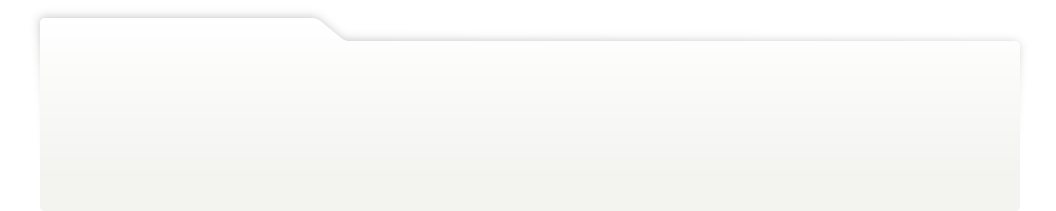
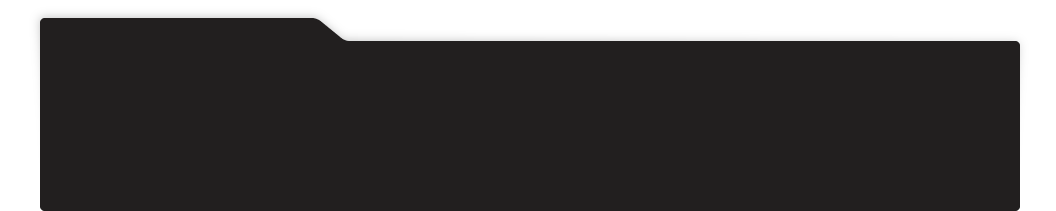
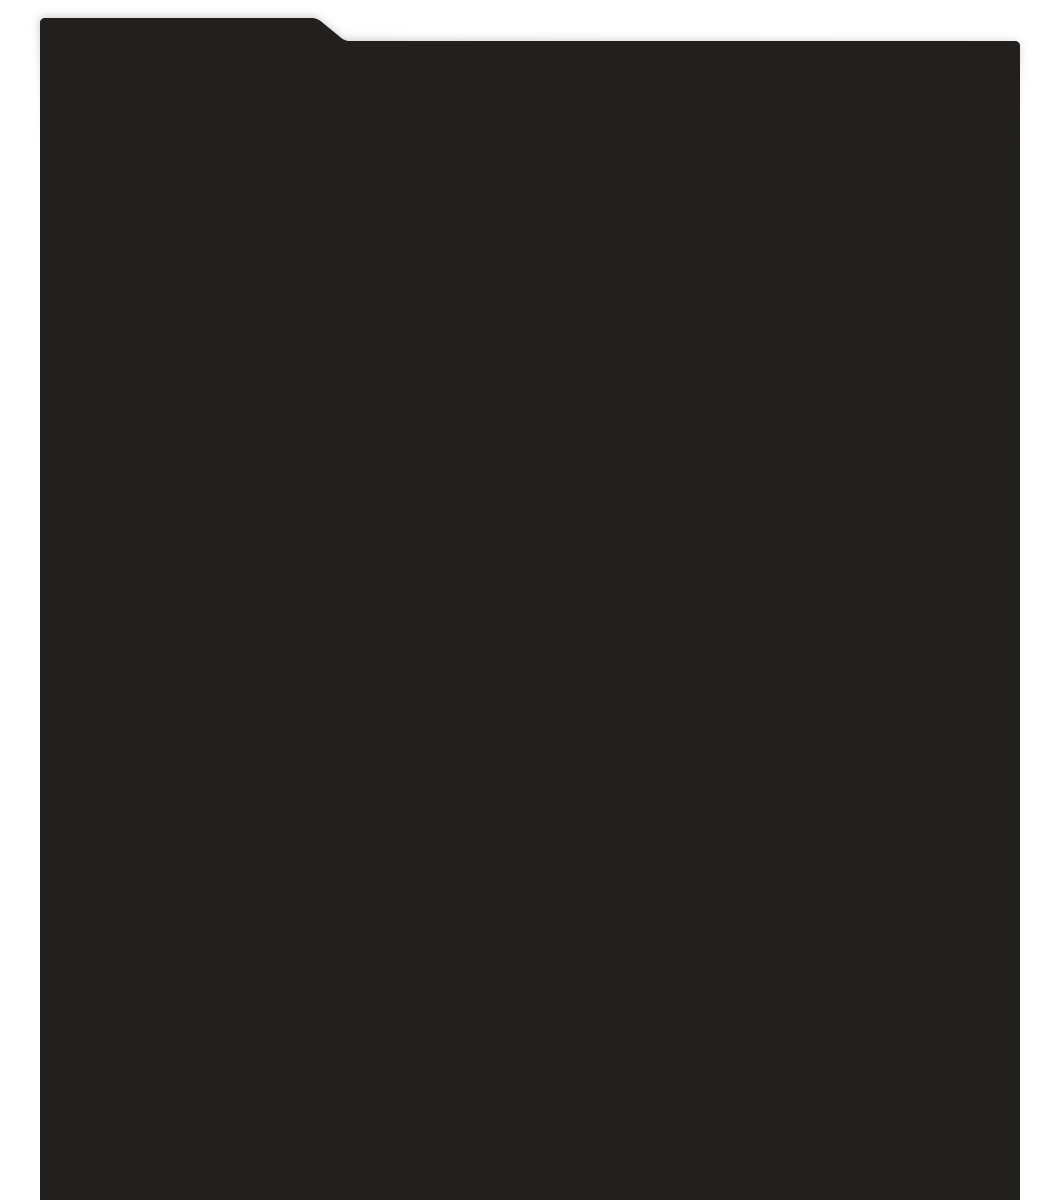
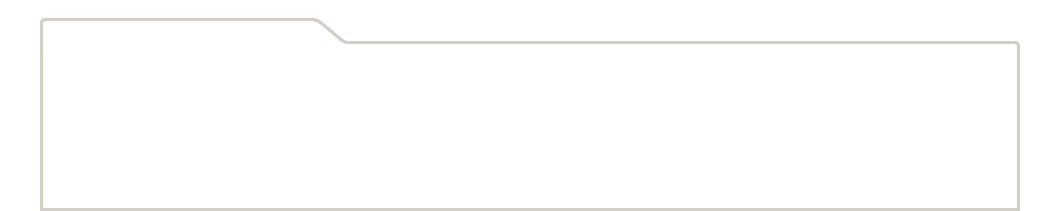
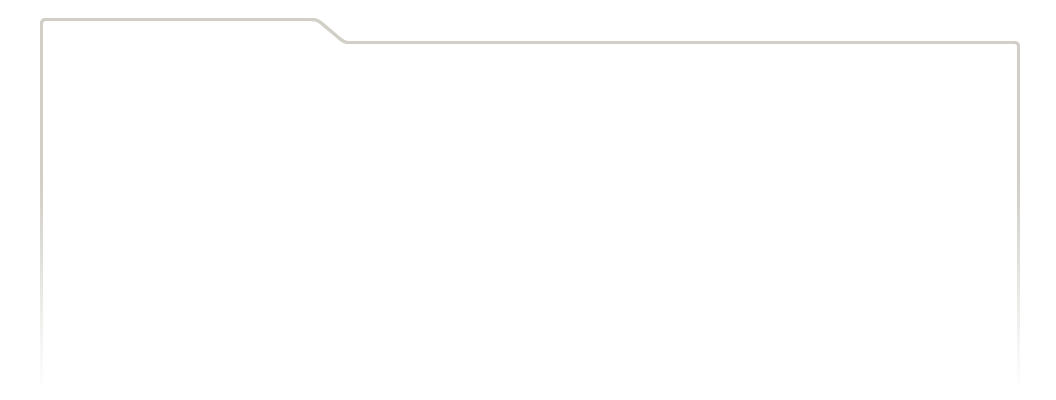
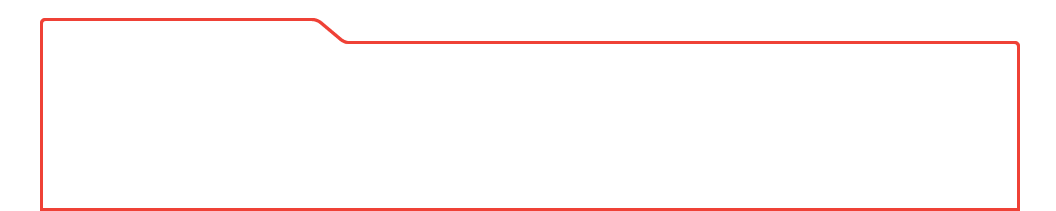
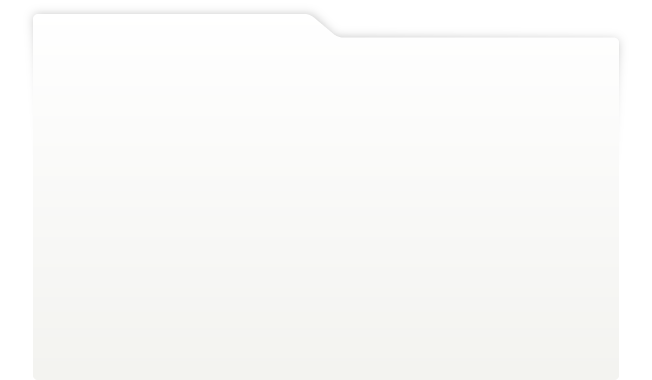
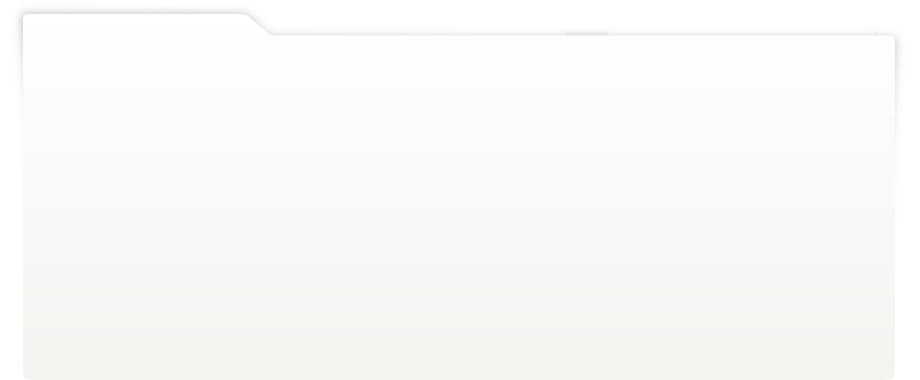
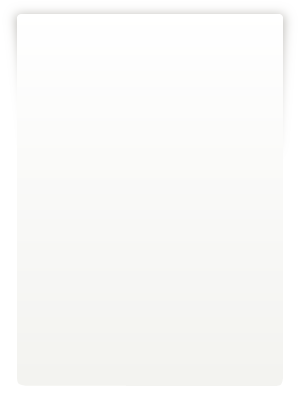
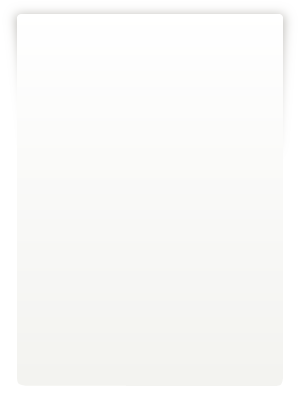
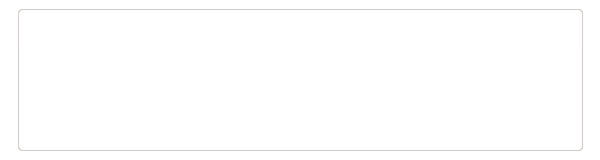
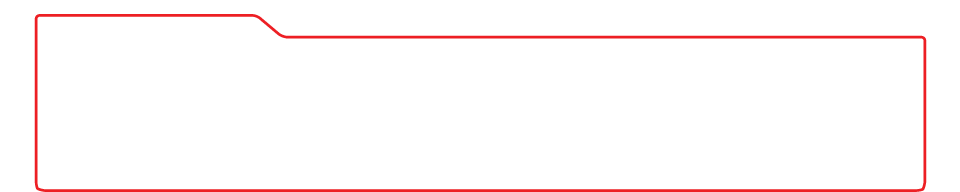
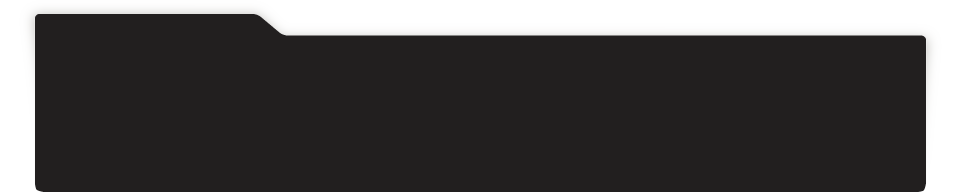
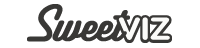
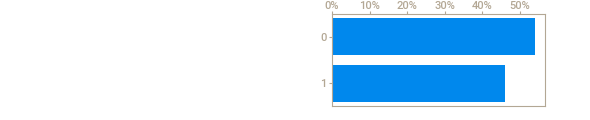
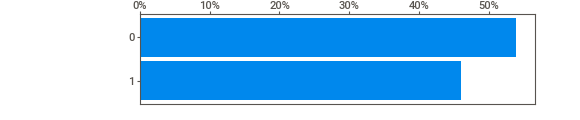
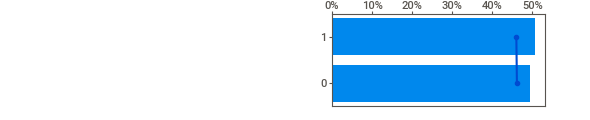
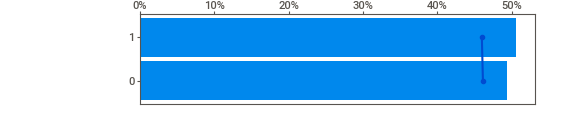
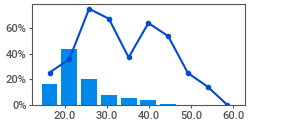
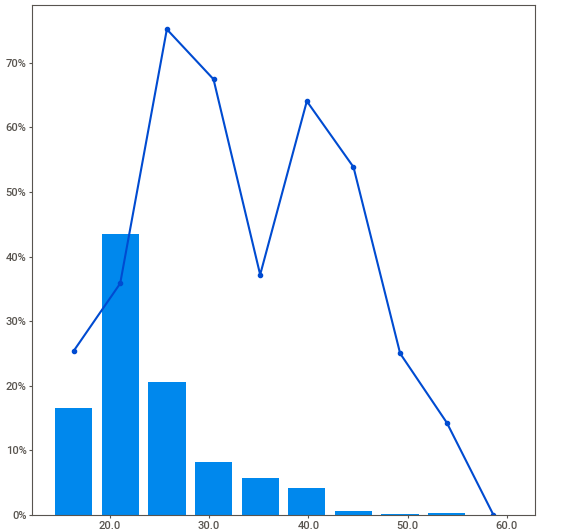
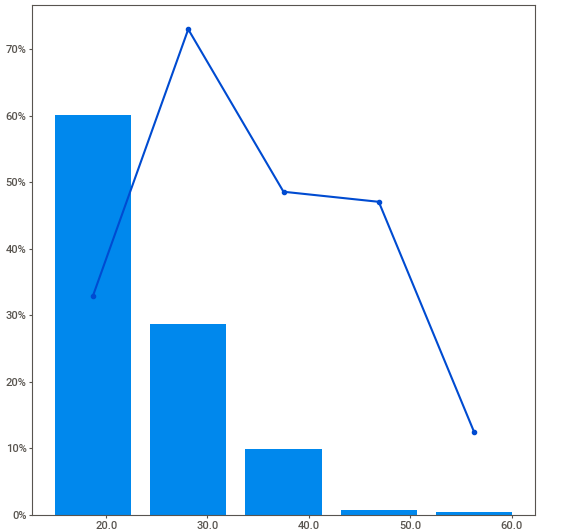
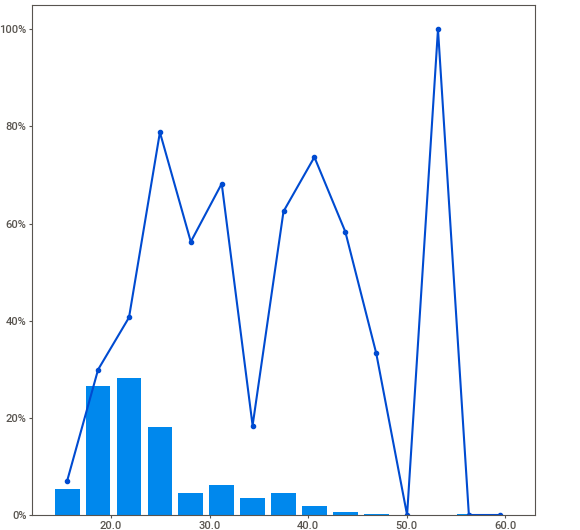
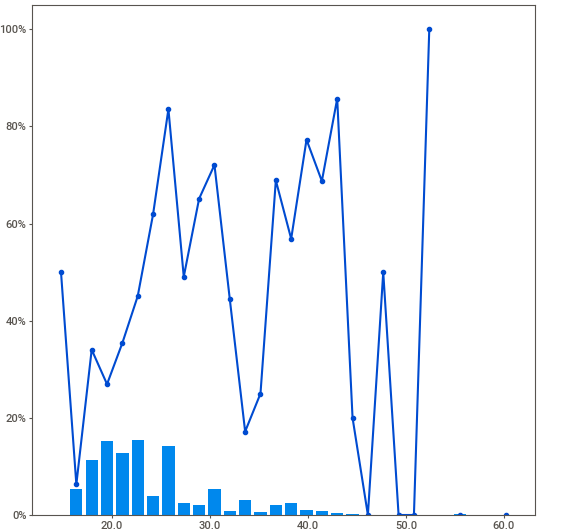
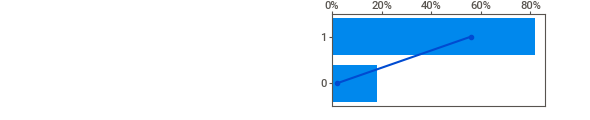
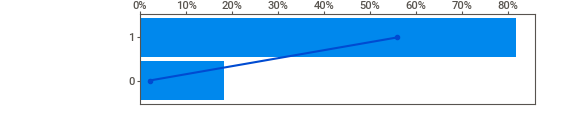
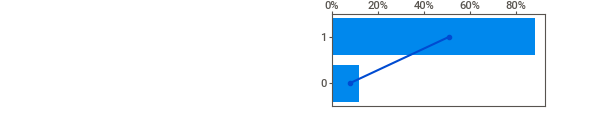
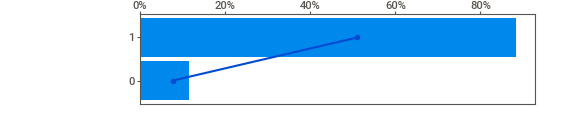
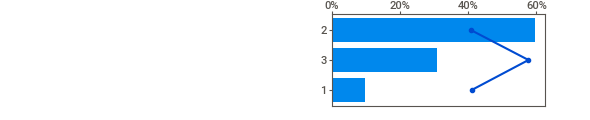
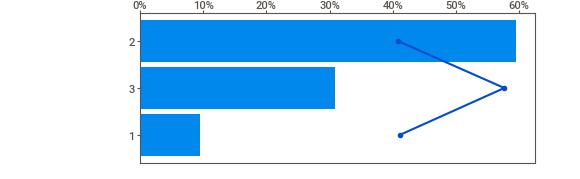
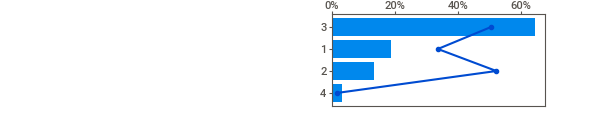
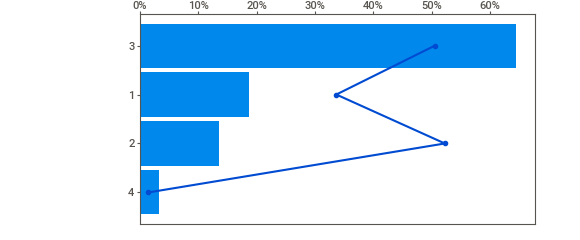
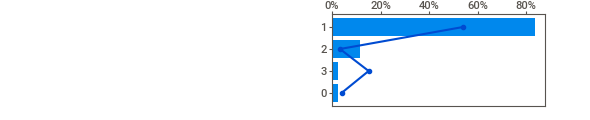
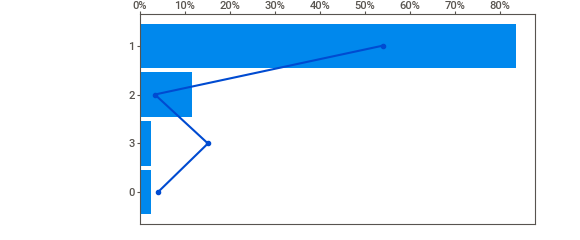
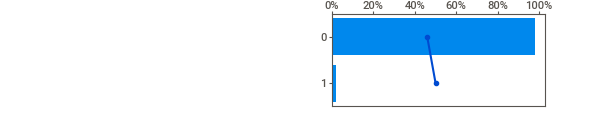
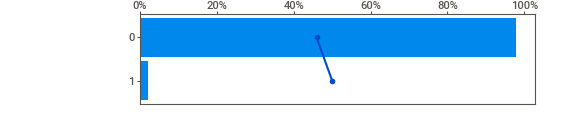
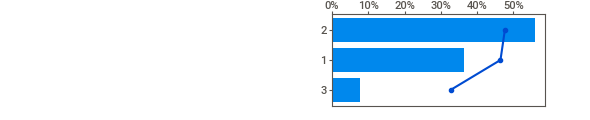
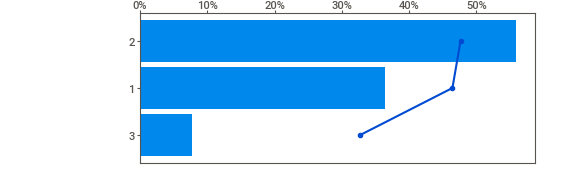
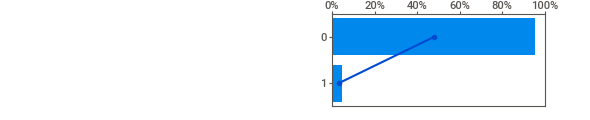
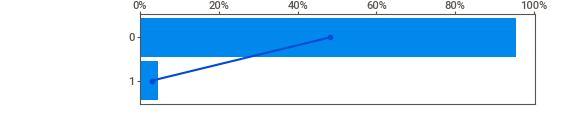
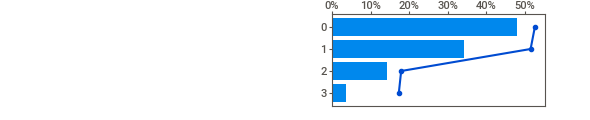
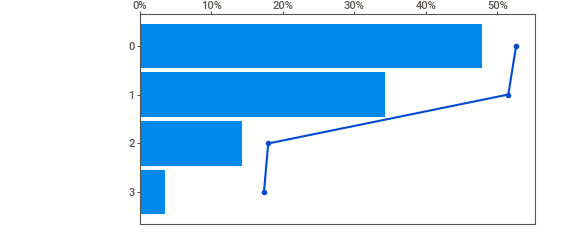
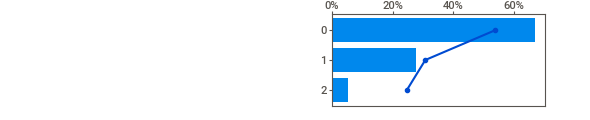
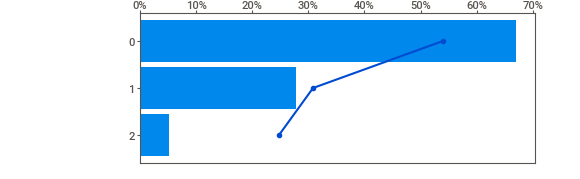
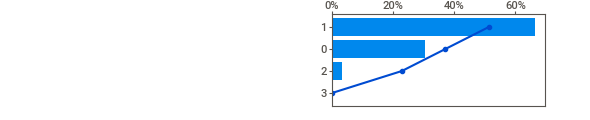
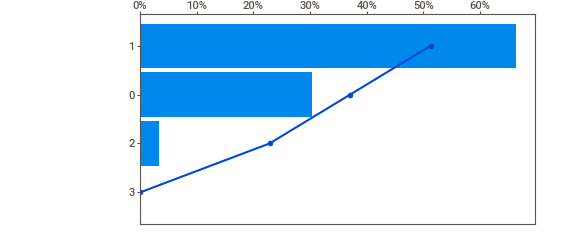
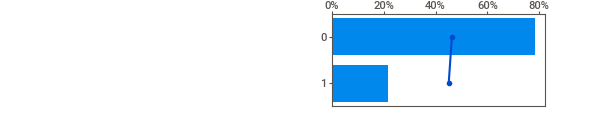
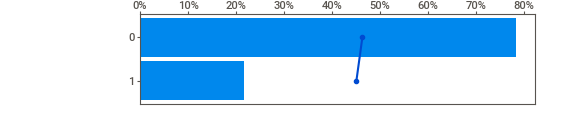
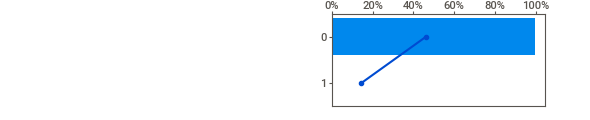
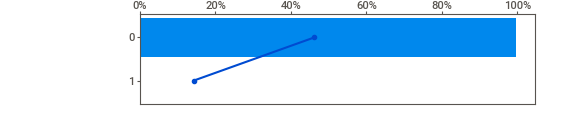
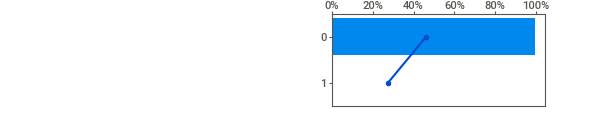
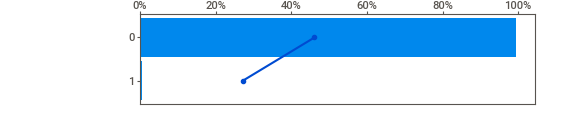
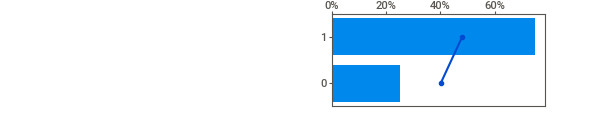
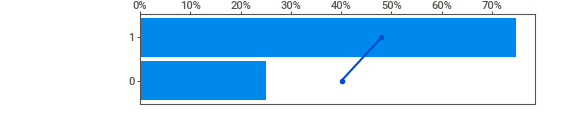
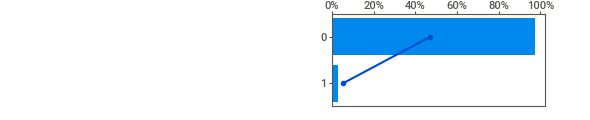
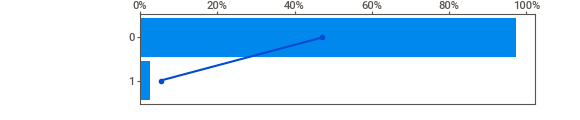
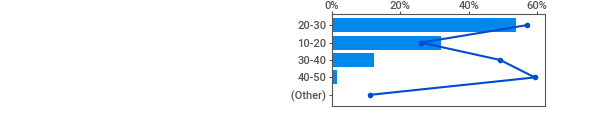
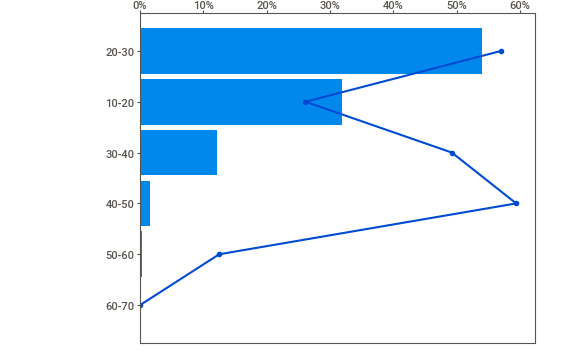
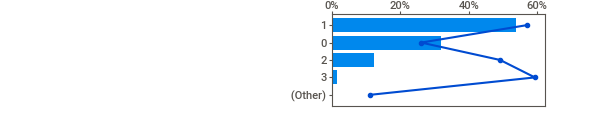
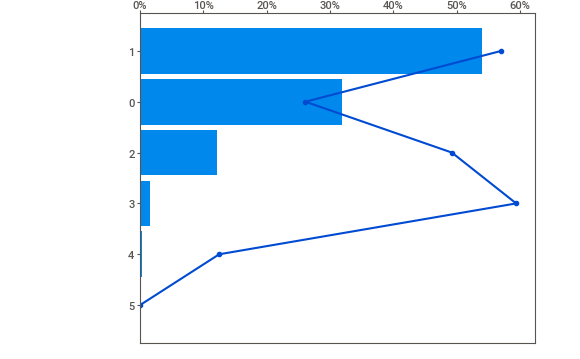
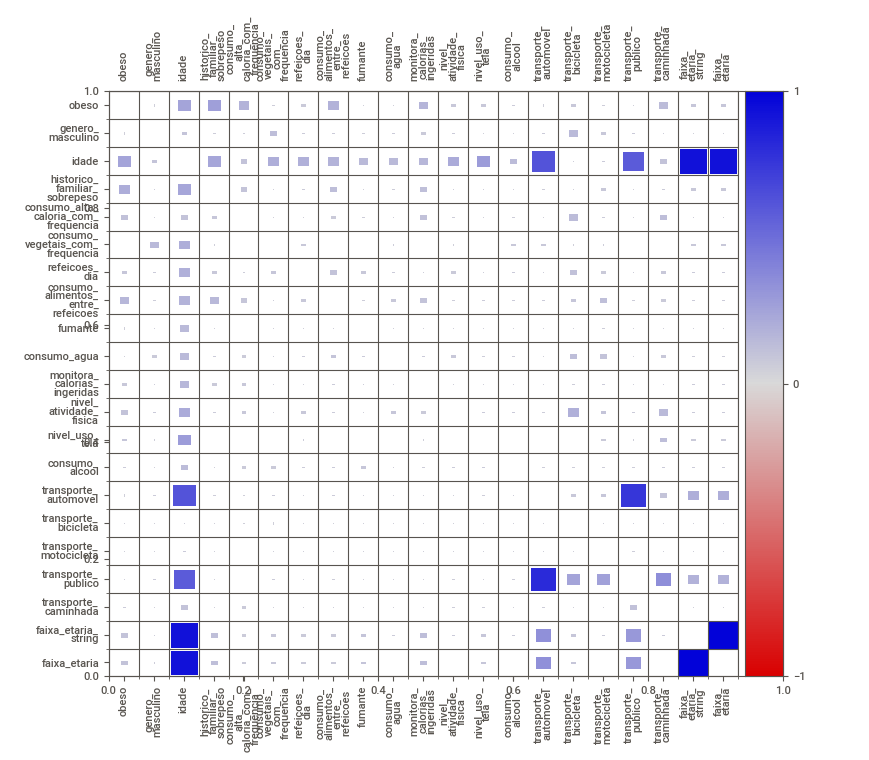
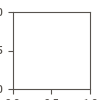

In [19]:
sv_report.show_notebook()

## Training the baseline model


In [20]:
X = df_obesity.drop(columns=["obeso", "idade", "faixa_etaria_string"])
y = df_obesity["obeso"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=51, shuffle=True
)

In [22]:
baseline_model = GaussianNB()
baseline_model.fit(X_train, y_train)

GaussianNB()

### Metrics from the baseline model


In [23]:
y_pred = baseline_model.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.60      0.73       339
           1       0.67      0.96      0.79       295

    accuracy                           0.76       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.76      0.76       634



In [25]:
baseline_recall = recall_score(y_test, y_pred, average="macro")
print(f"Baseline recall: {baseline_recall}")

Baseline recall: 0.775901204939753


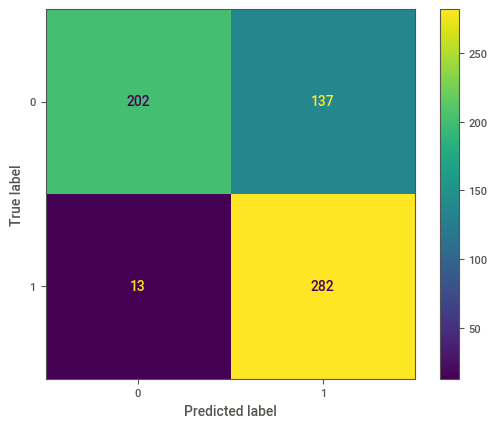

In [26]:
kbest_confusion_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(kbest_confusion_matrix).plot()

## Training the model with automated feature selection


In [27]:
# Select K best features
selector = SelectKBest(score_func=chi2, k=5)
selector.fit(X_train, y_train)
selected_features = X.columns[selector.get_support()]

X_train_selected = selector.transform(X_train)
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)

X_test_selected = selector.transform(X_test)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)

In [28]:
X_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   historico_familiar_sobrepeso  1477 non-null   int64
 1   monitora_calorias_ingeridas   1477 non-null   int64
 2   nivel_atividade_fisica        1477 non-null   int64
 3   nivel_uso_tela                1477 non-null   int64
 4   faixa_etaria                  1477 non-null   int64
dtypes: int64(5)
memory usage: 57.8 KB


In [29]:
kbest_model = GaussianNB()
kbest_model.fit(X_train_selected, y_train)

GaussianNB()

### Metrics from the model with automated feature selection


In [30]:
y_pred = kbest_model.predict(X_test_selected)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59       339
           1       0.59      0.96      0.73       295

    accuracy                           0.68       634
   macro avg       0.76      0.70      0.66       634
weighted avg       0.77      0.68      0.66       634



In [32]:
baseline_recall = recall_score(y_test, y_pred, average="macro")
print(f"Baseline recall: {baseline_recall}")

Baseline recall: 0.6950002499875007


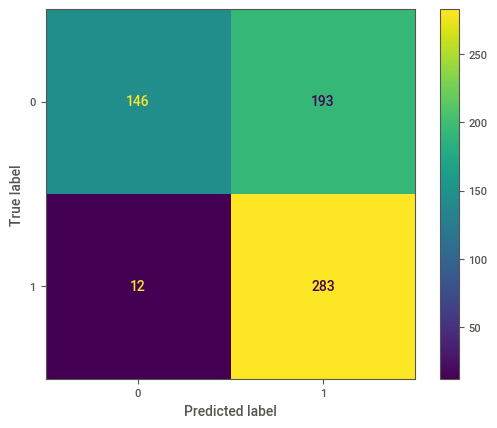

In [33]:
kbest_confusion_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(kbest_confusion_matrix).plot()

## Tunning the model with hyperparameter optimization


In [34]:
from optuna import Trial


def naive_bayes_objective(trial: Trial):
    k = trial.suggest_int("k", 1, 18)

    selector = SelectKBest(score_func=chi2, k=k)
    selector.fit(X_train, y_train)
    selected_features = X.columns[selector.get_support()]

    X_train_selected = selector.transform(X_train)
    X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)

    X_test_selected = selector.transform(X_test)
    X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)

    model = GaussianNB()
    model.fit(X_train_selected, y_train)

    y_pred = model.predict(X_test_selected)

    recall = recall_score(y_test, y_pred, average="macro")

    return k, recall

In [35]:
search_space = {"k": range(1, 19)}
naive_bayes_study = optuna.create_study(
    sampler=optuna.samplers.GridSampler(search_space=search_space),
    directions=["minimize", "maximize"],
)
naive_bayes_study.optimize(naive_bayes_objective, n_trials=50)

[I 2024-09-07 11:00:43,456] A new study created in memory with name: no-name-85b9e190-7e0b-42a6-abaf-ee1f50127973
[I 2024-09-07 11:00:43,462] Trial 0 finished with values: [2.0, 0.6659517024148793] and parameters: {'k': 2}.
[I 2024-09-07 11:00:43,482] Trial 1 finished with values: [7.0, 0.748537573121344] and parameters: {'k': 7}.
[I 2024-09-07 11:00:43,495] Trial 2 finished with values: [9.0, 0.775681215939203] and parameters: {'k': 9}.
[I 2024-09-07 11:00:43,502] Trial 3 finished with values: [11.0, 0.7727313634318285] and parameters: {'k': 11}.
[I 2024-09-07 11:00:43,508] Trial 4 finished with values: [15.0, 0.7742062896855157] and parameters: {'k': 15}.
[I 2024-09-07 11:00:43,512] Trial 5 finished with values: [5.0, 0.6950002499875007] and parameters: {'k': 5}.
[I 2024-09-07 11:00:43,517] Trial 6 finished with values: [3.0, 0.6138143092845358] and parameters: {'k': 3}.
[I 2024-09-07 11:00:43,521] Trial 7 finished with values: [17.0, 0.775901204939753] and parameters: {'k': 17}.
[I 

In [36]:
best_recall = max(naive_bayes_study.best_trials, key=lambda trial: trial.values[1])

print("The trial with best recall is:")
print(f"- Number: {best_recall.number}")
print(f"- k: {best_recall.values[0]}")
print(f"- Recall: {best_recall.values[1]}")

The trial with best recall is:
- Number: 10
- k: 8.0
- Recall: 0.780105994700265


In [37]:
fig = optuna.visualization.plot_pareto_front(naive_bayes_study)
fig.show()

## Training the final model


In [38]:
# Select K best features
best_k = int(best_recall.values[0])
selector = SelectKBest(score_func=chi2, k=best_k)
selector.fit(X_train, y_train)
selected_features = X.columns[selector.get_support()]

X_train_selected = selector.transform(X_train)
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)

X_test_selected = selector.transform(X_test)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)

In [39]:
X_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   historico_familiar_sobrepeso         1477 non-null   int64
 1   consumo_alta_caloria_com_frequencia  1477 non-null   int64
 2   consumo_alimentos_entre_refeicoes    1477 non-null   int64
 3   monitora_calorias_ingeridas          1477 non-null   int64
 4   nivel_atividade_fisica               1477 non-null   int64
 5   nivel_uso_tela                       1477 non-null   int64
 6   transporte_caminhada                 1477 non-null   int64
 7   faixa_etaria                         1477 non-null   int64
dtypes: int64(8)
memory usage: 92.4 KB


In [40]:
final_model = GaussianNB()
final_model.fit(X_train_selected, y_train)

GaussianNB()

### Metrics from the final model


In [41]:
y_pred = final_model.predict(X_test_selected)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.61      0.74       339
           1       0.68      0.95      0.79       295

    accuracy                           0.77       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.77      0.76       634



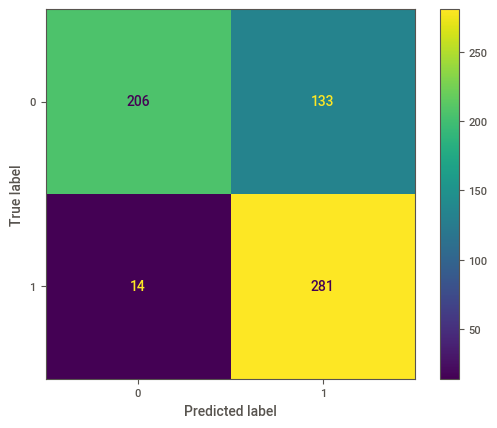

In [43]:
final_model_confusion_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(final_model_confusion_matrix).plot()

## Saving the final model


In [44]:
import os
import joblib

os.makedirs("models", exist_ok=True)
joblib.dump(final_model, "models/obesity_model.pkl")

['models/obesity_model.pkl']